# Pythonで始める機械学習 2.3.2.2~2.3.2.3

## 前回の復習

#### 2クラス分類に使う簡単なデータセット forge

In [1]:
#読み込み
import mglearn
import matplotlib.pyplot as plt

X,y = mglearn.datasets.make_forge()
print(X,y)
print(X.shape)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
(26, 2)


C:\Users\hikoto\anaconda3\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


#### 問１ 教師あり学習のクラス分類に使う機械学習手法は？
答え：k-近傍法、決定木、ロジスティック回帰

In [2]:
#skit-learnによるk-nn実装

#まずは訓練のデータとテストデータに分割
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

#knnアルゴリズムをskleanから呼び出す
from sklearn.neighbors import KNeighborsClassifier

#k-nnオブジェクト生成、パラメータ設定
clf = KNeighborsClassifier(n_neighbors = 3)

#モデル生成
clf.fit(X_train,y_train)

#精度測定
print(clf.score(X_test,y_test))

0.8571428571428571


## 2.3.2.2 K-nnの解析

#### 問２ k-nnの仕組みを一般的に説明せよ

まず、訓練データをn次元空間上にプロットする。<br>
次にテストデータを同様にn次元空間上にプロット、そこから最も距離の近いn個のデータを確認する。<br>
そのn個のデータも最も多数が属するクラスにデータを分類する。

### 決定境界とは
この仕組みから、n次元空間上の全ての点においてどの分類になるのかを示す領域を定めることができる。<br>
この領域の境界を決定境界という。

### 決定境界の図示
２次元平面で直感的に分かりやすいforgeデータセットの決定境界を図示してみる。

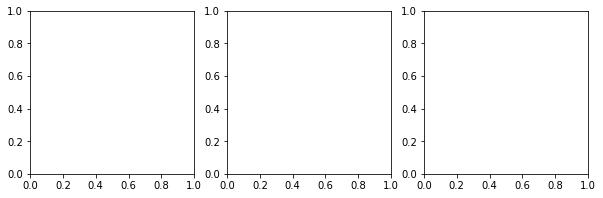

In [29]:
#どのような図を作るのか指定
#複数の図を並べるときに使う
#subplots(行数、列数、図の大きさ) 
fig,axes = plt.subplots(1,3,figsize=(10,3)) #３つの図が並ぶ
print(axes)

### zipってなんだ？

In [30]:
#zipは複数のリストを１つにまとめる関数

a = [1,2,4]
b = [4,5,6]
c = zip(a,b)
list(c)

[(1, 4), (2, 5), (4, 6)]

#### これが何に使えるのか？

例えば片方のリストに学籍番号が、もう片方のリストにテストの点が入っているとする。<br>
テストの点順に学籍番号を出力したいが、テストの点だけソートしても学籍番号も<br>
一緒に並べ替えないと意味がない、、、<br>

#### 問3 学籍番号とテストの点が格納されたリストがある。zip関数を使って学籍番号をテスト得点の高い順に出力せよ。

In [31]:
#a1は56点、a4は89点
gakuseki = ["a1","a2","a3","a4"]
score = [56,90,43,89]

#答え
x = zip(score,gakuseki)
x = sorted(x,reverse=True)
score,gakuseki = zip(*x)
print(gakuseki)

('a2', 'a4', 'a1', 'a3')


### zipについて理解したところで、決定境界の図示へ

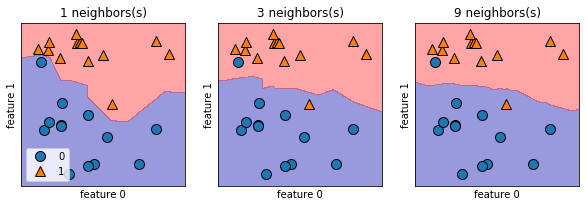

In [36]:
import mglearn

fig,axes = plt.subplots(1,3,figsize=(10,3)) 

for n_neighbors,ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

#### 問４ n=1とn=3ではどういった違いがあるだろうか
答え：n=1のモデルは訓練データに対応しすぎてかなり境界が複雑である。一方、nの数を増やすと境界は滑らかになる。<br>
これはモデルが単純であるということと同義であり、つまり汎化性能が高いことを意味する。

#### 複雑なデータセットで上記の議論が適用できるか確かめてみよう

### ウィスコンシン乳がんデータセット(cancer)　分類タスク
乳がんの測定結果とそれが良性か悪性かが記録されている。

In [41]:
#データのインポート
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [46]:
#データの分割
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data, cancer.target,stratify=cancer.target, random_state=66)

In [48]:
#性能を記録するリスト
training_accuracy = []
test_accuracy = []

#nを１から１１まで試したい
neighbors = [1,2,3,4,5,6,7,8,9,10,11]

for n_neighbors in neighbors:
    #モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #精度を記録
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

print(training_accuracy)
print(test_accuracy)

[1.0, 0.9765258215962441, 0.9577464788732394, 0.9553990610328639, 0.9483568075117371, 0.9460093896713615, 0.9436619718309859, 0.9413145539906104, 0.9342723004694836, 0.9389671361502347, 0.9342723004694836]
[0.9020979020979021, 0.8881118881118881, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9370629370629371, 0.9300699300699301, 0.9300699300699301, 0.916083916083916, 0.916083916083916, 0.916083916083916]


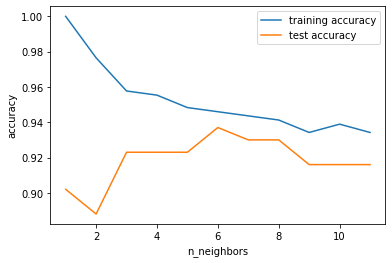

In [49]:
#可視化

plt.plot(neighbors,training_accuracy,label="training accuracy")
plt.plot(neighbors,test_accuracy,label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### 問６ このグラフはどう解釈できるだろうか？(n=1の状態、n=10の状態はそれぞれなんと言うか)
テスト性能が初め極端に高いのはモデルが複雑すぎて過剰適合が、n=8以降は<br>
モデルが単純すぎて適合不足が起きている。最適なのはn=6のときと言えるが、<br>
常に最小値は8割以上あるため、これでも十分な場合もある。

## 2.3.2.3 k-近傍回帰
実はk-近傍法で回帰を行う方法がある。<br>
これはk最近傍回帰と呼ばれ、プロットしたデータの最もユークリッド距離が近い<br>
データ平均値を予測値として返すアルゴリズムである。<br>
### waveデータセット
ここでも同様に、まずは単純なデータセットでアルゴリズムを可視化する。

In [53]:
X,y = mglearn.datasets.make_wave(n_samples=40)
print(X,y)
print(X.shape)

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]] [-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.4741103

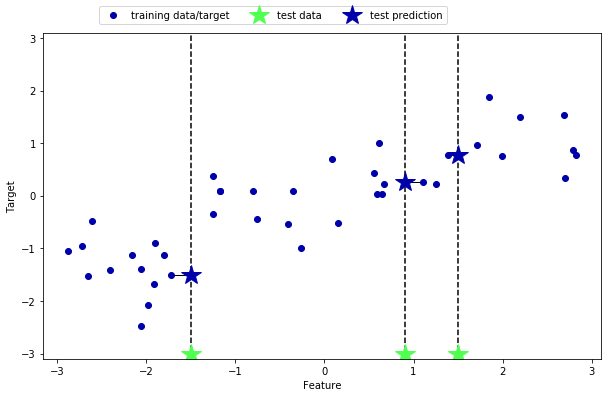

In [55]:
#可視化
#n=1、これは即ち、一番近い点の値をそのまま返している。
mglearn.plots.plot_knn_regression(n_neighbors=1)

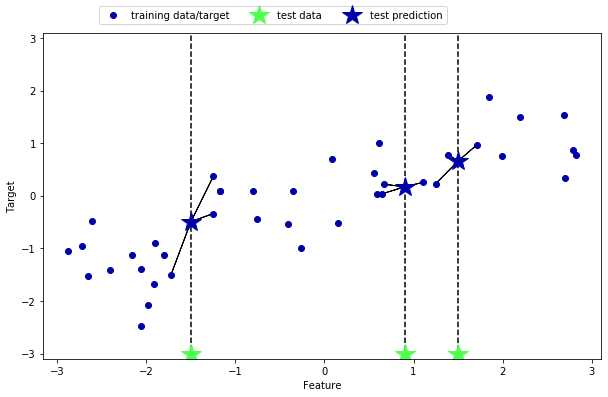

In [56]:
#n=3
mglearn.plots.plot_knn_regression(n_neighbors=3)

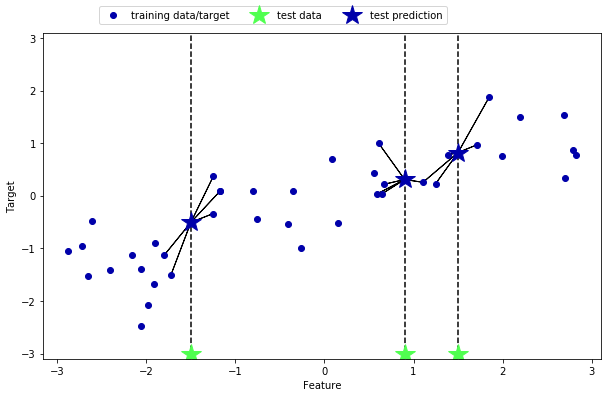

In [57]:
#n=5
mglearn.plots.plot_knn_regression(n_neighbors=5)

In [60]:
#sikitlearnでもやってみる
from sklearn.neighbors import KNeighborsRegressor

#データを分割
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

#パラメータは３に
reg = KNeighborsRegressor(n_neighbors=3)

#学習
reg.fit(X_train,y_train)

#予測値の出力
print(reg.predict(X_test))

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


### 精度の出力
分類タスクであれば単に正解の数を数えればよかったが、連続的な値を取る回帰の場合、精度はどう評価すべきだろうか？<br>
例えば、予測値と実測値の差を合計すれば精度の指標になりそうである。つまり、予測値の集合<br>$$f={f_1,f_2....f_n}$$<br>と実測値$$y={y_1,y_2....y_n}$$<br>に対し、<br>精度を$$\sum_{k=1}^{n} (y_i-f_i)$$<br>と定義する。これは一般的に「残差」と呼ばれている。<br>
#### 問7 この定義はどんな問題があるか
答え：例えばデータセットが10億単位のデータのときと、0.00001単位のときでは前者の方が精度が<br>
多きくなる。即ち、スケールが合わなくなる。また、精度が負になることもあり、<br>
これでは異なるデータセット間で精度の比較は難しい。<br>


### より良い精度の定義
上記の問題を解決するために、まず、精度が負にならないよう２乗にする。<br>
即ち、<br>
$$\sum_{k=1}^{n} (y_i-f_i)^2$$
<br>
また、直感的には精度は確率で表されたほうがよいだろう。従って、0～1の値を取るように調節したい。<br>
従って、何らかの値で割ることを考える。<br>
<br>
確率の定義とは、偶然に起こるある出来事の、全ての減少に対する割合のことである。<br>
例えばサイコロで１が出る確率はサイコロの起こ得る全事象の数6のうちの1である。<br>
つまり、和集合の要素数で割ることができれば確率になる。<br>
回帰の場合は、予測値と実測値が、予測値の平均値に対して「変動」しえる値の合計で割ればスケールが調整されるはず。
<br>
<br>
例えば、上の残差は予測値に対する実測値の変動と言える。これは残差変動と呼ばれている。<br>
これに対し、全てのデータの中心である、「実測値の平均」と予測値の差を考える。これは回帰変動と呼ばれている。<br>
即ち、<br>
$$\sum_{k=1}^{n} (f_i-\bar{y})^2$$
<br>
回帰の際に発生する変動は次の２つしかないことが証明されている。<br>
この２つを足したものは「全変動」と呼ばれ、色々と数式をいじると以下の等式が成り立つことが知られている。<br>
<br>

$$\sum_{k=1}^{n} (y_i-f_i)^2 + \sum_{k=1}^{n} (f_i-\bar{y})^2 = \sum_{k=1}^{n} (y_i-\bar{y})^2$$

<br>
これで
$$\sum_{k=1}^{n} (y_i-f_i)^2$$
<br>
を割れば、間違っている確率を出すことができる。<br>
精度を測るにはここから１を引けばいい。従って、精度は
<br>
$$R^2 = 1-\frac{\sum_{k=1}^{n} (f_i-\bar{y})^2}{\sum_{k=1}^{n} (y_i-\bar{y})^2}$$
<br>
となるだろう。これは決定係数と呼ばれている。<br>
しかしこの値も万能ではなく、変数が多いほど大きい値になる欠点がある。<br>
従って、今度は変数の数を使って変数のスケールを調整すればいい。変数の数をkとすると、<br>
<br>
$$R^2 = 1-\frac{\frac{\sum_{k=1}^{n} (f_i-\bar{y})^2}{n-k-1}}{\frac{\sum_{k=1}^{n} (y_i-\bar{y})^2}{n-1}}$$
<br>
となる。これは自由度調整済み決定係数と呼ばれている。<br>

In [62]:
#というわけで、回帰モデルの精度は、
print(reg.score(X_test,y_test))

0.8344172446249604


In [67]:
#回帰でも同様に決定境界を引いてみる
#つまり、全ての点に対する予測値を可視化する
import numpy as np

#-3から3までの値を1000等分した値を格納した配列を作る
line = np.linspace(-3,3,1000).reshape(-1,1)
line

array([[-3.        ],
       [-2.99399399],
       [-2.98798799],
       [-2.98198198],
       [-2.97597598],
       [-2.96996997],
       [-2.96396396],
       [-2.95795796],
       [-2.95195195],
       [-2.94594595],
       [-2.93993994],
       [-2.93393393],
       [-2.92792793],
       [-2.92192192],
       [-2.91591592],
       [-2.90990991],
       [-2.9039039 ],
       [-2.8978979 ],
       [-2.89189189],
       [-2.88588589],
       [-2.87987988],
       [-2.87387387],
       [-2.86786787],
       [-2.86186186],
       [-2.85585586],
       [-2.84984985],
       [-2.84384384],
       [-2.83783784],
       [-2.83183183],
       [-2.82582583],
       [-2.81981982],
       [-2.81381381],
       [-2.80780781],
       [-2.8018018 ],
       [-2.7957958 ],
       [-2.78978979],
       [-2.78378378],
       [-2.77777778],
       [-2.77177177],
       [-2.76576577],
       [-2.75975976],
       [-2.75375375],
       [-2.74774775],
       [-2.74174174],
       [-2.73573574],
       [-2

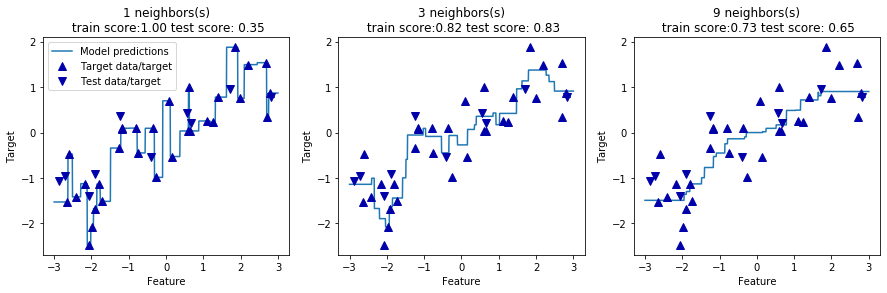

In [70]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
#lineの各値に対する予測値を可視化する
#パラメータを1,3,9と変えて実験
for n_neighbors,ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(0),markersize=8)
    
    ax.set_title(
        "{} neighbors(s)\n train score:{:.2f} test score: {:.2f}".format(
            n_neighbors,reg.score(X_train,y_train),
            reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions","Target data/target",
               "Test data/target"],loc="best")

ここでも同様に、テスト性能が初め極端に高いのはモデルが複雑すぎて過剰適合が、n=9では<br>
モデルが単純すぎて適合不足が起きている。最適なのはn=３のときと言える。

### k-nnのメリット
・理解しやすい
<br>
### k-nnのデメリット
・特徴量が増えると計算時間が極端にかかる→前処理の必要性<br>
・殆ど特徴量が0になるような、疎なデータセットでは性能が極端に落ちる
<br>
#### →k-nnは実用的ではないが、複雑なモデルを適用するためのベースラインに使うのが良い。
